<a href="https://colab.research.google.com/github/marcemateo/github.io/blob/main/Sprint_3_ipynb_nueva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3er entrega - Sistemas de recomendación

En esta entrega vamos a trabajar con un sistema de recomendación.

La idea consiste en crear un modelo de recomendacion. Pueden descargar los archivos desde el siguiente link: 

https://drive.google.com/drive/folders/1F58VdEmIUakN7dOvaLeEmd5xCRrSJgB6?usp=sharing


Consigna:

- El primer paso consiste en lograr leer los archivos desde el drive y armar los 2 datasets, el de entrenamiento y el de validacion.

- Se pide ademas, crear un 3er conjunto de testeo donde deberan extraer de los primeros 2 un sample y no utilizar estos datos para entrenar. Es decir, del conjunto total de datos, armar 3 dfs, training, test y validation.

- Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
- Las recomendaciones tienen que ser para cada account_id y hay que recomendar content_id.
- Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar). Se acepta solamente que se recomiende este caso si el usuario vio el contenido solamente 1 vez y el mismo posee un rating que se encuentre en el ultimo decil.
- Evaluarlo con MAP.
- Se valora la originalidad en el codigo, no es valido recrear el mismo utilizado durante las clases.


Recomendaciones:
- Al momento de leer los datos, los archivos llamados "base" forman el conjunto de training y los "test" el de test. 
- Quedarse con las columnas user_id; item_id; raiting; ts
- Comenzar con algo simple
- Cuando el modelo ya este funcionando, mejorarlo e ir cubriendo los distintos requisitos. 


Fecha de entrega y exposicion: **27 de abril de 2023**.

Como desafio adicional, es necesario que suban el archivo a un repositorio de github (publico) y enviar el link del mismo al siguiente mail: martin.jaureguy.95@gmail.com.





# Desarrollo

In [2]:
# Importamos las dependencias

import pandas as pd

1. Leer los archivos desde Drive y generar un dataset para train y otro para test.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Defino la ubicación de la carpeta con los archivos
ubicacion = "/content/drive/MyDrive/Spring 3 Sistemas de Recomendación/archivos (1)"

In [5]:
# lista con nombres de archivos de entrenamiento y de test
train_files = ["u1.base", "u2.base", "u3.base", "u4.base", "u5.base"]

validacion_files = [f"u{num}.test" for num in range(1,6)]

In [6]:
print(train_files)
print(validacion_files)

['u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base']
['u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test']


In [7]:
# Leemos y concatenamos el contenido de los archivos en DataFrames
df_train = [pd.read_csv(f"{ubicacion}/{file_name}", sep="\t", names=["user_id", "item_id", "raiting", "ts"]) for file_name in train_files]

In [8]:
type(df_train)

list

In [9]:
df_train[1]

,user_id,item_id,raiting,ts
0,1,3,4,878542960
1,1,4,3,876893119
2,1,5,3,889751712
3,1,6,5,887431973
4,1,7,4,875071561
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [10]:
df_train_concatenado = pd.concat(df_train, ignore_index=True)

In [11]:
df_train_concatenado.shape

(400000, 4)

In [12]:
# Hacer lo mismo para Test

In [13]:
# Leemos y concatenamos el contenido de los archivos en DataFrames
df_valid = [pd.read_csv(f"{ubicacion}/{file_name}", sep="\t", names=["user_id", "item_id", "raiting", "ts"]) for file_name in validacion_files]

In [14]:
df_valid_concatenado = pd.concat(df_valid, ignore_index=True)

In [15]:
print(df_valid_concatenado)

       user_id  item_id  raiting         ts
0            1        6        5  887431973
1            1       10        3  875693118
2            1       12        5  878542960
3            1       14        5  874965706
4            1       17        3  875073198
...        ...      ...      ...        ...
99995      943     1028        2  875502096
99996      943     1044        3  888639903
99997      943     1047        2  875502146
99998      943     1228        3  888640275
99999      943     1330        3  888692465

[100000 rows x 4 columns]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#paso 1 hago el split del conjunto de dato de train y 
X_train, X_test=train_test_split(df_train_concatenado, test_size=0.2, random_state=42)
#paso 2 hago el spplit del conjunto de datos de validacion
X_valid, X_valid_test=train_test_split(df_valid_concatenado,test_size=0.2, random_state=42)
#paso 3 uno/concateno lo que extraje del conjunto de datos en el paso 1 y 2
df_test=pd.concat([X_test,X_valid_test], ignore_index=True )

In [18]:
df_test.head()

,user_id,item_id,raiting,ts
0,380,629,2,885478497
1,344,174,5,884900993
2,532,592,3,874791850
3,825,864,3,880756725
4,852,1,4,891036457


In [19]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(X_valid_test.shape)
print(df_test.shape)

(320000, 4)
(80000, 4)
(80000, 4)
(20000, 4)
(100000, 4)


In [20]:
X_train.head()

,user_id,item_id,raiting,ts
242245,15,300,4,879455166
288918,480,175,3,891208356
105103,311,781,2,884366307
63504,781,289,3,879633862
239180,934,492,4,891192087


Generamos la matriz pivot

In [21]:
matrix_columns = ["user_id", "item_id", "raiting"]

In [22]:
interactions = X_train[matrix_columns]
interactions.head()

,user_id,item_id,raiting
242245,15,300,4
288918,480,175,3
105103,311,781,2
63504,781,289,3
239180,934,492,4


In [23]:
print(interactions.duplicated().sum())

220166


In [24]:
interactions = interactions.drop_duplicates()

In [25]:
interactions_matrix = interactions.pivot(index='user_id', columns='item_id', values='raiting')
interactions_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
interactions_matrix = interactions_matrix.fillna(0)

In [27]:
interactions_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
interactions_matrix.shape

(943, 1681)

Transformaamos a un sparse row (achicamos)

In [29]:
from scipy.sparse import csr_matrix
interactions_matrix_csr = csr_matrix(interactions_matrix.values)

In [30]:
interactions_matrix_csr

<943x1681 sparse matrix of type '<class 'numpy.float64'>'
	with 99834 stored elements in Compressed Sparse Row format>

In [31]:
interactions_matrix_csr.shape

(943, 1681)

In [32]:
interactions_matrix_csr[0].toarray()

array([[5., 3., 4., ..., 0., 0., 0.]])

In [33]:
# Contamos la cantidad de recomendaciones de cada usuario
user_ids = range(interactions_matrix_csr.shape[0])
user_dict = {}

#Recorremos las filas (los user_ids)
for i in user_ids:
    counter = 0 

    #Recorremos los items (los item_ids)
    for val in interactions_matrix_csr[i].toarray()[0]:
      if val > 0:
        counter += 1
    
    #Establecemos el valor de la cantidad de recomendaciones para el usuario user_id
    user_dict[i] = counter
    

In [34]:
#pareciera no contar???
user_dict

{0: 272,
 1: 62,
 2: 54,
 3: 24,
 4: 175,
 5: 211,
 6: 402,
 7: 59,
 8: 22,
 9: 184,
 10: 180,
 11: 51,
 12: 634,
 13: 98,
 14: 104,
 15: 140,
 16: 28,
 17: 276,
 18: 20,
 19: 48,
 20: 179,
 21: 128,
 22: 151,
 23: 68,
 24: 78,
 25: 107,
 26: 25,
 27: 79,
 28: 34,
 29: 43,
 30: 36,
 31: 40,
 32: 24,
 33: 20,
 34: 25,
 35: 20,
 36: 57,
 37: 121,
 38: 22,
 39: 35,
 40: 52,
 41: 182,
 42: 221,
 43: 151,
 44: 48,
 45: 27,
 46: 25,
 47: 66,
 48: 214,
 49: 24,
 50: 23,
 51: 56,
 52: 28,
 53: 64,
 54: 21,
 55: 187,
 56: 106,
 57: 154,
 58: 382,
 59: 208,
 60: 21,
 61: 232,
 62: 93,
 63: 200,
 64: 80,
 65: 38,
 66: 30,
 67: 34,
 68: 65,
 69: 131,
 70: 38,
 71: 137,
 72: 66,
 73: 39,
 74: 79,
 75: 82,
 76: 72,
 77: 21,
 78: 54,
 79: 29,
 80: 58,
 81: 168,
 82: 155,
 83: 68,
 84: 286,
 85: 23,
 86: 210,
 87: 21,
 88: 76,
 89: 300,
 90: 98,
 91: 387,
 92: 19,
 93: 398,
 94: 277,
 95: 56,
 96: 63,
 97: 27,
 98: 136,
 99: 58,
 100: 66,
 101: 216,
 102: 29,
 103: 111,
 104: 23,
 105: 64,
 106: 22,
 

In [35]:
df_review_counts = pd.Series(user_dict,)
df_review_counts

0      272
1       62
2       54
3       24
4      175
      ... 
938     49
939    107
940     22
941     79
942    168
Length: 943, dtype: int64

<Axes: ylabel='Frequency'>

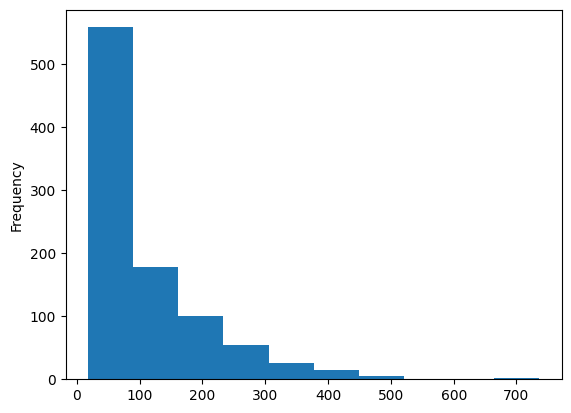

In [36]:
df_review_counts.plot(kind='hist')

**Modelo**

Ya tenemos la matriz lista para entrenar el modelo.

Utilizaremos la librería LFM (light fm)

Primero que nada instalamos la librería y definimos nuestro modelo:

In [37]:
pip install lightfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=879129 sha256=8e9b3b5dd8d73024d92e82ffb90830e38a09bb1ebbe6b3b3ca31846d87382642
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [38]:
from lightfm import LightFM

model = LightFM(no_components=3, random_state=100, learning_rate=0.03)

In [39]:
%%time
#COMPLETAR
model = model.fit(interactions_matrix_csr, epochs=10)

CPU times: user 270 ms, sys: 0 ns, total: 270 ms
Wall time: 271 ms


In [40]:
model

Ahora podríamos generar recomendaciones simplemente haciendo:

In [41]:
import numpy as np
user_x = user_dict[18]
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)
#ACA GENERAMOS PREDICCIONES
preds = model.predict(user_ids=user_x, item_ids = item_ids)

 Array que obtenemos son los scores que le da el modelo a cada item para el usuario 18. Podemos ordenarlo y obtener las mejores recomendaciones

In [42]:
scores = pd.Series(preds)
scores.index = interactions_matrix.columns
recomms_18 = list(pd.Series(scores.sort_values(ascending=False).index))[:10] #obtenemos las primeras 10

In [43]:
recomms_18

[50, 258, 288, 181, 100, 294, 1, 300, 286, 127]

¿Qué había visto el usuario 18 (en el set de train)?

In [44]:
X_train[(X_train.user_id==18)].item_id.unique()

array([463, 654,  64, 169, 489, 215,  88, 845, 221, 190,  70, 496,  79,
        72, 863, 629, 482, 443, 631, 211, 179,   9,  71, 709,  81, 659,
        95, 194, 603,  59, 630,  22, 317, 476, 951,  52,   1, 210,  57,
       602, 510, 737, 238, 609, 180,  97, 283, 136, 378, 921, 633, 955,
       276, 487, 492, 162, 133, 692, 132, 153, 627, 792, 188, 216, 236,
       382,  15, 530, 234, 739, 781, 736, 971, 966, 157, 512, 519, 805,
        58, 435, 775, 704, 529, 959, 699,  48, 319, 968, 168, 419,  23,
       175, 520,  99, 187, 432, 196, 702, 497,  25, 513, 964, 199, 425,
       418, 480,  42, 127, 485, 214, 607, 708, 213, 285, 193, 516, 488,
       582, 430, 151, 143, 604, 165, 923, 131, 427, 461, 958, 275, 794,
       195, 527, 972, 191, 663,  12, 954, 732, 588, 707, 953, 515, 549,
       186, 116, 962,   4, 494, 614, 428, 189, 170, 952, 166,  19,  82,
       517, 381, 735, 957, 416,  89, 113, 973, 451,  65, 714,  45, 967,
       639, 486,  32, 269, 778,  98, 241, 524, 483, 357, 509,  9

Ya había visto alguno de los contenidos que le estamos recomendando?

In [45]:
X_train[(X_train.user_id==18) & (X_train.item_id.isin(recomms_18))].item_id.unique()

array([  1, 127,  50, 286, 181, 100])

Si ya había visto las 1, 127,  50, 286, 181, 100
Deberíamos filtrarla de las recomendaciones ya que no queremos recomendar contenido visto anteriormente.

Para esto:

1) Obtener listado de películas vistas (en train) por el usuario 18

In [46]:
user_18_watched = X_train[X_train.user_id == 18].item_id.unique()

2) Filtrar esas películas de la lista de recomendaciones

In [47]:
recomms_18 = [rec for rec in recomms_18 if rec not in user_18_watched]

In [48]:
recomms_18

[258, 288, 294, 300]

COLD START

¿Qué pasa con los usuarios que no tenemos en el set de train?

Podemos recomendarles por ejemplo, los contenidos más populares.

Para esto, basandonos en el set de train vamos a generar un dataset ordenado por popularidad.

Generar un dataset ordenado por popularidad (cantidad de usuarios que le dieron un rating, sin importar el rating).

In [49]:
X_train

,user_id,item_id,raiting,ts
242245,15,300,4,879455166
288918,480,175,3,891208356
105103,311,781,2,884366307
63504,781,289,3,879633862
239180,934,492,4,891192087
...,...,...,...,...
259178,213,684,4,878956000
365838,447,716,2,878856573
131932,655,77,3,887430746
146867,815,227,2,878695147


In [50]:
X_train.groupby("item_id", as_index=False).agg({"user_id":"nunique"})

,item_id,user_id
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1676,1678,1
1677,1679,1
1678,1680,1
1679,1681,1


In [51]:
popularity_df = X_train.groupby("item_id", as_index=False).agg({"user_id":"nunique"}).sort_values(by="user_id", ascending=False)

popularity_df.columns=["item_id", "popularity"]
popularity_df.head()

,item_id,popularity
49,50,583
257,258,508
99,100,508
180,181,506
293,294,484


Obtener una lista con los 10 contenidos más populares

In [52]:
popular_content = popularity_df.item_id.values[:10]

In [53]:
popularity_df.head(10).item_id.values

array([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121])

In [54]:
popular_content

array([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121])

Ahora basándonos en el ejemplo anterior, vamos a generar 10 recomendaciones para todos los usuarios.

Debemos tener en cuenta:

Filtrar contenidos que el usuario vio anteriormente
Si el usuario no está en el set de train, recomendarle los 10 contenidos más populares

In [55]:
interactions_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
interactions_matrix.shape

(943, 1681)

In [57]:
interactions_matrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [106]:
from tqdm import tqdm

#definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict = {
    'user_id': [],
    'recomms': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(X_test.user_id.unique()):
    #COMPLETAR: Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(interactions_matrix.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
    #  user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      #COMPLETAR: Generar las predicciones para el usuario x
      preds = model.predict(user_ids=user_x, item_ids = item_ids)

      #COMPLETAR: Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = interactions_matrix.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = X_train[X_train.user_id == user].item_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 10
      recomms = [x for x in scores if x not in watched_contents][:10]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict['user_id'].append(user)
      recomms_dict['recomms'].append(scores)
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict['recomms'].append(popular_content)

100%|██████████| 943/943 [00:03<00:00, 275.28it/s]


Ya tenemos las recomendaciones. Convertimos el dict a dataframe:

In [ ]:
#recomms_df = pd.DataFrame(recomms_dict)
#recomms_df

In [110]:
import numpy as np

# Definir la cantidad de recomendaciones a generar por usuario
num_recs = 20

# Crear una matriz para almacenar las recomendaciones para cada usuario
recs_matrix = np.zeros((n_users, num_recs))

lista_recomendados=[]
# Iterar sobre cada usuario y generar las recomendaciones correspondientes
for i, user_id in enumerate(user_dict.keys()):
    user_x = user_dict[user_id]
    preds = model.predict(user_ids=user_x, item_ids=item_ids)

    scores = pd.Series(preds)
    scores.index = interactions_matrix.columns
    recomms = list(pd.Series(scores.sort_values(ascending=False).index))[:num_recs]
    lista_recomendados.append(recomms)
    
    recs = np.argsort(preds)[::-1][:num_recs]
    recs_matrix[i] = recs

# La matriz recs_matrix contiene las 20 mejores recomendaciones para cada usuario

df_recomendaciones = pd.DataFrame(lista_recomendados, columns=[f"Rec{i+1}" for i in range(num_recs)])

In [111]:
df_recomendaciones

,Rec1,Rec2,Rec3,Rec4,Rec5,Rec6,Rec7,Rec8,Rec9,Rec10,Rec11,Rec12,Rec13,Rec14,Rec15,Rec16,Rec17,Rec18,Rec19,Rec20
0,50,258,286,288,294,100,181,300,1,313,7,237,121,127,174,269,56,117,222,98
1,50,258,181,288,100,294,1,286,127,300,121,222,7,174,172,56,237,313,98,269
2,50,258,286,294,100,181,288,300,1,127,121,174,7,313,237,117,56,98,222,748
3,50,258,181,288,100,294,286,127,300,121,1,174,98,237,172,222,7,56,117,204
4,50,258,181,288,100,294,286,1,300,127,121,174,7,222,237,98,56,172,313,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,50,258,288,100,181,294,286,300,1,127,121,7,237,174,313,222,56,117,98,269
939,50,258,288,181,100,294,286,1,300,127,121,237,7,222,174,56,313,172,98,117
940,50,258,288,181,100,294,1,127,286,300,121,222,7,237,172,56,174,98,313,405
941,50,258,288,294,100,181,286,1,300,313,127,7,121,237,174,56,222,269,117,98


In [112]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ml_metrics-0.1.4.tar.gz (5.0 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [113]:
ideal_recomms = X_test\
                  .sort_values(by=["user_id", "raiting"], ascending=False)\
                  .groupby(["user_id"], as_index=False)\
                  .agg({"item_id": "unique"})

ideal_recomms.shape


(943, 2)

Merge entre los DataFrames ideal_recomms y recomms_df

In [118]:
df_map = ideal_recomms.merge(recomms_df, how="left", left_on="user_id", right_on="user_id")[["user_id", "item_id", "recomms"]]
df_map.columns = ["user_id", "ideal", "recomms"]
df_map.head(5)

,user_id,ideal,recomms
0,1,"[224, 246, 1, 60, 170, 204, 258, 183, 111, 59,...","[50, 258, 181, 100, 294, 286, 288, 300, 1, 127..."
1,2,"[127, 316, 285, 272, 251, 313, 242, 50, 100, 2...","[50, 258, 181, 100, 294, 286, 288, 300, 1, 127..."
2,3,"[340, 321, 318, 331, 260, 334, 307, 268, 343, ...","[50, 258, 181, 100, 294, 286, 288, 300, 1, 127..."
3,4,"[294, 361, 324, 359, 354, 362, 360, 50, 303, 2...","[50, 258, 181, 100, 294, 286, 288, 300, 1, 127..."
4,5,"[186, 174, 257, 436, 434, 396, 169, 433, 382, ...","[50, 258, 181, 100, 294, 286, 288, 300, 1, 127..."


Calculando la precisión promedio media (AP) para cada usuario en el conjunto de prueba

In [119]:
aps = [] # lista vacia para ir almacenando la AP de cada recomendación

for pred, label in df_map[["ideal", "recomms"]].values:

  n = len(pred) # cantidad de elementos recomendados

  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1

  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada item

  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de Verdaderos positivos

  denom = arange[rel_k] # posiciones donde se encuentran los items relevantes

  if denom.size > 0 and denom.min() > 0:
    ap = (tp / denom).sum() / len(label) # average precision
  else:
    ap = 0.0

  aps.append(ap)


In [120]:
MAP =np.mean(aps)

In [121]:
MAP

0.07748509929620934